In [19]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#### Getting data from dataset

In [20]:
data = keras.datasets.fashion_mnist

### Splitting data in training and testing set

In [21]:
(train_images,train_labels),(test_images,test_labels) = data.load_data()

In [22]:
print(train_labels[6])

7


This shows us that the labels are marked in no from 0-9 and thus we need to define a list for each label

### What does each label mean

In [23]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Checking how image is there

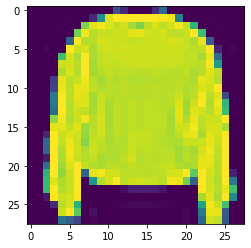

In [24]:
plt.imshow(train_images[7])# need to do plt.show() in normal python

Converting image to black and white

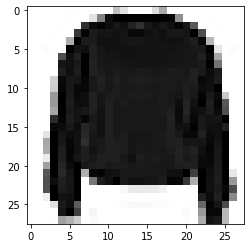

In [25]:
plt.imshow(train_images[7],cmap = plt.cm.binary)

HOW IMAGE ACTUALLY LOOKS LIKE IN MEMORY

In [26]:
print(train_images[7])

[[  0   0   0   0   0   1   1   0   0   0   0  63  28   0   0   0  33  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   2   0   0  28 126 241 255 255 255 255 255 255 252
  248 111   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 206 244 251 241 230 238 221 205 230 240 230
  239 251 233 165   0   0   2   0   0   0]
 [  0   0   0   1   0   0 199 251 228 234 233 236 235 245 247 237 234 239
  230 230 235 255 176   0   0   1   0   0]
 [  0   0   0   0   0  81 254 226 228 239 237 236 234 232 233 235 235 236
  239 237 233 225 246  73   0   0   0   0]
 [  0   0   3   0   0 255 235 239 223 234 238 236 237 236 235 235 235 235
  236 235 234 230 231 255  24   0   4   0]
 [  0   0   0   0 177 239 223 254 223 232 234 234 236 236 235 235 235 235
  235 234 231 233 222 246  88   0   1   0]
 [  0   0   0   0 234 239 229 255 220 232 233 232 234 235 235 235 235 235
  234 233 232 230 228 254 140   0   0   0]
 [  0   0   0   0 225 240 226 255 221 227 232 228 231 230 228 22

Above data shows pixel value  
A 2D lists(28 * 28 lists)  
List of lists  
Each list correspond to each row.  
  
range : 0 - 255  
0 = white  
255 = black  

# Normalizing data
 ->  We divide by 255 as each image is stored in a matrix/2d array form
     the matrix has value from 0-255,  
     thus to make calculations easier we want to normalize the data out of 1.  
     Done to make calculations small!  
     

In [29]:
train_images = train_images/255.0
test_images = test_images/255.0

## Creating Model
#### Model with 3 layers
    # 1. All inputs viz. 28*28 pixels  
    # 2. A random no. of nodes in hidden layer  
    # 3. Last layer with 10 nodes as there are 10 types of data we want to distinguist  
    # ->Each node with return a value with the prediction percentage of each type  
    

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = "relu"),
    keras.layers.Dense(10,activation = "softmax")
])

### Setting Parameters for the Model

In [34]:
model.compile(optimizer = "adam",loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

metrics tell us what we are looking at when testing the model  
and how low we want the loss fn to be  

### Training model

In [35]:
model.fit(train_images,train_labels,epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 222us/sample - loss: 1.0866 - accuracy: 0.6493
Epoch 2/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.6414 - accuracy: 0.7682
Epoch 3/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.5627 - accuracy: 0.7994
Epoch 4/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.5187 - accuracy: 0.8163
Epoch 5/5
60000/60000 [==============================] - 7s 113us/sample - loss: 0.4911 - accuracy: 0.8273


#### epochs  : how many times you go throught the same data again and again.(in random order)
ie. we want things to come in diffirent order every time so it doesnt memorize  
incresing epochs doesnt nessasirly mean model will be more accurate always  
have to play with its value for your model  


### Evaluate model on testing data

test_loss : contains loss percentage  
test_acc : contains test accuracy  


In [36]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [38]:
print("loss :",test_loss)
print("accuracy: ",test_acc)

loss : 0.5078909673690796
accuracy:  0.82
